In [10]:
import warnings
warnings.filterwarnings("ignore")

Loaded 100 files. Each file has 4097 data points.


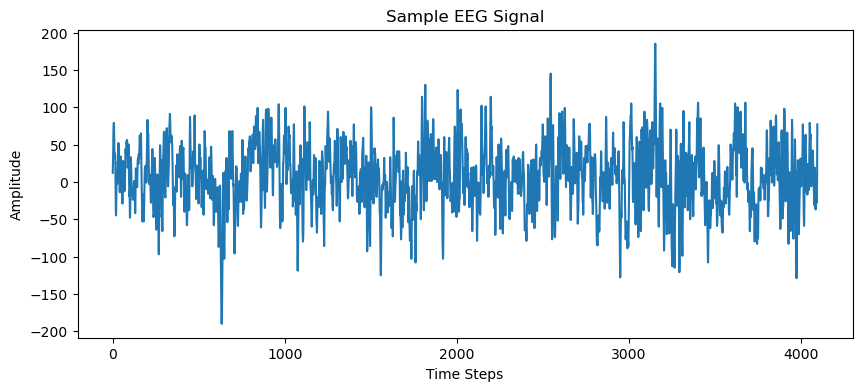

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data_folder = r"C:\Users\nisha\Downloads\z\Z"

# Load EEG data from .txt files
def load_eeg_data(data_folder):
    eeg_data = []
    file_names = []
    for file_name in os.listdir(data_folder):
        if file_name.endswith('.txt'):
            file_path = os.path.join(data_folder, file_name)
            with open(file_path, 'r') as file:
                signal = [float(line.strip()) for line in file.readlines()]
                eeg_data.append(signal)
                file_names.append(file_name)
    return np.array(eeg_data, dtype=object), file_names

eeg_data, file_names = load_eeg_data(data_folder)
print(f"Loaded {len(eeg_data)} files. Each file has {len(eeg_data[0])} data points.")

plt.figure(figsize=(10, 4))
plt.plot(eeg_data[0])
plt.title("Sample EEG Signal")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.show()

def normalize_signal(signal):
    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

normalized_data = np.array([normalize_signal(signal) for signal in eeg_data])


In [5]:
# Extract basic statistical features
def extract_features(signal):
    return [
        np.mean(signal),            # Mean
        np.std(signal),             # Standard Deviation
        np.min(signal),             # Minimum
        np.max(signal),             # Maximum
        np.median(signal),          # Median
        np.var(signal)              # Variance
    ]

features = np.array([extract_features(signal) for signal in normalized_data])
print("Extracted features shape:", features.shape)


Extracted features shape: (100, 6)


In [6]:
# Labels for each file (replace with your dataset's actual labeling scheme)
# Example: 0 for normal and 1 for epileptic
labels = np.array([0 if 'Z' in file_name else 1 for file_name in file_names])

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (60, 6)
Validation data shape: (20, 6)
Test data shape: (20, 6)


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest Classifier
model = RandomForestClassifier(random_state=42)


In [8]:
# Train the model
model.fit(X_train, y_train)
print("Model training complete.")


Model training complete.


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on validation data
y_val_pred = model.predict(X_val)

# Evaluate performance
print("Validation Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Validation Performance:
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [12]:
# Predict on test data
y_test_pred = model.predict(X_test)

# Evaluate performance on test data
print("Test Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred):.4f}")


Test Performance:
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


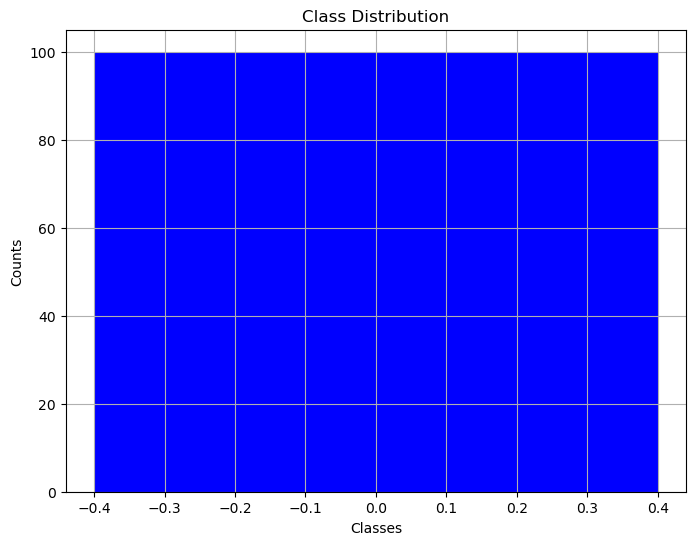

Class Distribution: {0: 100}


In [19]:
import numpy as np

# Calculate class distribution
unique, counts = np.unique(labels, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Plot class distribution
plt.figure(figsize=(8, 6))
plt.bar(unique, counts, color='blue')
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.grid()
plt.show()

print("Class Distribution:", class_distribution)


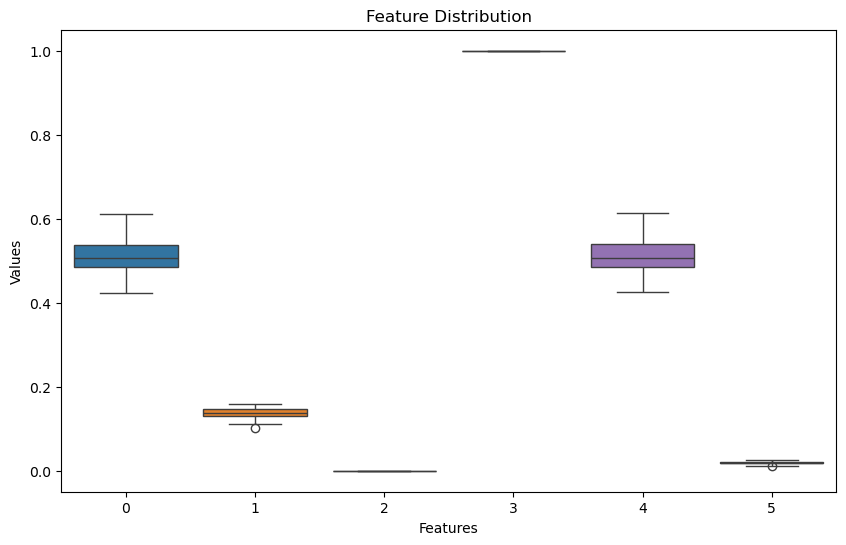

In [17]:
# Assume `feature_matrix` is the feature set
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=features)
plt.title("Feature Distribution")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()


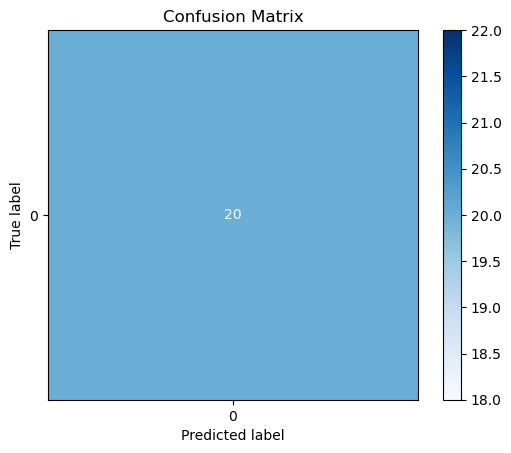

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming `y_val` and `y_val_pred` are the true and predicted labels for validation set
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(labels))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
